In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!pip install -U -q PyDrive
  
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
  
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1UPP5JkUo-M0X1FtVlyhpxH8_lF5qsZmh/view?usp=sharing'
  
import pandas as pd
  
# to get the id part of the file
id = link.split("/")[-2]
  
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('efsyn_covid.csv')  
  
df = pd.read_csv('efsyn_covid.csv')
print(df)

     Unnamed: 0  ...      time
0             0  ...  15:10:00
1             1  ...  13:46:00
2             2  ...  14:00:00
3             3  ...  12:59:00
4             4  ...  11:49:00
..          ...  ...       ...
588         588  ...  12:11:00
589         589  ...  20:59:00
590         590  ...  13:52:00
591         591  ...  18:00:00
592         592  ...  06:00:00

[593 rows x 10 columns]


In [ ]:
df.head()

Unnamed: 0  ...      time
0           0  ...  15:10:00
1           1  ...  13:46:00
2           2  ...  14:00:00
3           3  ...  12:59:00
4           4  ...  11:49:00

[5 rows x 10 columns]

In [ ]:
#df['date']=pd.to_datetime(df['date'],dayfirst=True)


In [ ]:
df['date'] =  pd.to_datetime(df['date']).dt.strftime('%d/%m/%Y') 


In [ ]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['day'] = pd.DatetimeIndex(df['date']).day
df['month'] = pd.DatetimeIndex(df['date']).month
#df['time'] = pd.DatetimeIndex(df['date']).time

In [ ]:
df.dtypes

Unnamed: 0     int64
title         object
date          object
summary       object
body          object
url           object
year           int64
day            int64
month          int64
time          object
dtype: object

Καθάρισμα:

In [ ]:
df["body"].replace({"article_end": " ", "\ngoogletag.cmd.push(function() {\ngoogletag.display": " "}, inplace=True)


In [ ]:
df.drop('Unnamed: 0', axis='columns', inplace=True)

In [ ]:
df.dropna()

title  ...      time
0    Τσακαλώτος: Η Ν.Δ μας έβαλε σε τροχιά ύφεσης π...  ...  15:10:00
1    Απογείωση χρέους προς το 200% του ΑΕΠ | Η Εφημ...  ...  13:46:00
2    Επίδομα... πτωχοκομείου δίνει η Ελλάδα | Η Εφη...  ...  14:00:00
3    Έσβησαν τα φώτα στη «Βαρβάκειο» σε ένδειξη δια...  ...  12:59:00
4    Εstiasigreece: η εστίαση υποφέρει | Η Εφημερίδ...  ...  11:49:00
..                                                 ...  ...       ...
588  Ανεβάζει ρυθμούς η αγορά - Ωράριο καταστημάτων...  ...  12:11:00
589  Ξεχειλίζει η δυσαρέσκεια στο παρά ένα του ανοί...  ...  20:59:00
590  Στο βά(ρα)θρο οι χαμηλόμισθοι | Η Εφημερίδα τω...  ...  13:52:00
591  Μικρο-στήριξη και για μελισσοκόμους | Η Εφημερ...  ...  18:00:00
592  Στη δεκαετία του ’80 οδηγούν τα αλλεπάλληλα κρ...  ...  06:00:00

[590 rows x 9 columns]

In [ ]:
df['body'] = df['body'].str.replace(r'\xa0'," ")

In [ ]:
df['body'] = df['body'].str.replace(r'\ngoogletag.cmd.push(function() {\ngoogletag.display("article_end");\n});\n'," ")

In [ ]:
#df['summary'] = df['summary'].str.replace(r'NO summary'," ")

In [ ]:
df.to_csv("efsyn_clean", index=False)

In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
df.to_csv('efsyn_clean.csv')
!cp efsyn_clean.csv "drive/My Drive/"

Ανάλυση:

1.

In [ ]:
a = df[df['year']==2020]

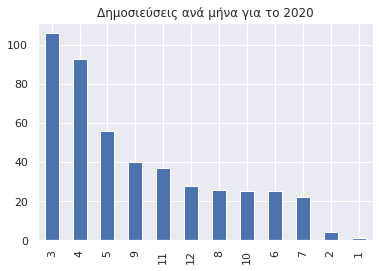

In [ ]:
a['month'].value_counts().plot(kind='bar', title = 'Δημοσιεύσεις ανά μήνα για το 2020')

In [ ]:
a['month'].value_counts().sum()

463

In [ ]:
b = df[df['year']==2021]

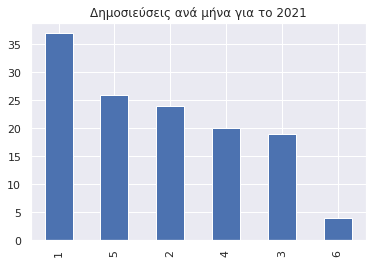

In [ ]:
b['month'].value_counts().plot(kind='bar', title = 'Δημοσιεύσεις ανά μήνα για το 2021')

In [ ]:
b['month'].value_counts().sum()

130

2. Word Clouds

In [ ]:
import spacy
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
#!python -m spacy download el_core_news_sm

# Επειτα κάνουμε Runtime ->  Restart Runtime, για να δει τις αλλαγές από το download..

In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
list(nlp.Defaults.stop_words)[0:20]

['στον',
 'εαυτόν',
 'αυτός',
 'είχαν',
 'μετά',
 'προ',
 'ανά',
 'πρόπερσι',
 'μόνην',
 'συχνήν',
 'τυχόν',
 'πόσης',
 'ιδίου',
 'άλλης',
 'όμως',
 'κιόλας',
 'μόνοι',
 'οσοιδήποτε',
 'υπόψη',
 'ένας']

In [ ]:
#wordcloud για Μάρτιο του 2020:

In [ ]:
text1 = a[a['month']==3]['body'].str.cat(sep = ' ').replace("googletag.cmd.push(function() {\ngoogletag.display", ' ')

In [ ]:
doc1 = nlp(df['body'][1])

In [ ]:
for token in doc1:
    print(token, token.lemma_)

Σε σε
ύφεση-τέρας ύφεση-τέρας
οδηγεί οδηγώ
ο ο
κορονοϊός κορονοϊός
την την
ελληνική ελληνικός
οικονομία οικονομία
. .
Νεότερες νεότερες
εκτιμήσεις εκτιμήσει
( (
μέσα μέσα
σε σε
μόνο μόνο
λίγες λίγες
μέρες μέρα
από από
τις τις
προηγούμενες προηγούμενα
για για
ύφεση ύφεση
4% 4%
) )
από από
τον τον
υπουργό υπουργό
Οικονομικών οικονομικά
, ,
Χρήστο Χρήστο
Σταϊκούρα Σταϊκούρα
, ,
προβλέπουν προβλέπω
ότι ότι
το το
ΑΕΠ αεπ
θα θα
βουλιάξει βουλιάξω
από από
5% 5%
έως έως
και και
10% 10%
φέτος φέτος
, ,
καταπίνοντας καταπίνω
επιχειρήσεις επιχειρήσει
, ,
εργαζόμενους εργαζόμενου
αλλά αλλά
και και
ολόκληρα ολόκληρα
κομμάτια κομμάτι
από από
τον τον
παραγωγικό παραγωγικό
ιστό ιστό
της της
χώρας χώρα
. .
Η η
διάλυση διάλυση
της της
ελληνικής ελληνικός
οικονομίας οικονομία
έχει έχω
ξεκινήσει ξεκινήσω
από από
τη τη
στιγμή στιγμή
που που
οι οι
τρεις τρεις
βασικοί βασικός
πυλώνες πυλώνα
της της
ανάπτυξης ανάπτυξη
, ,
τουρισμός τουρισμό
, ,
οικοδομή οικοδομή
και και
ακτοπλοΐα ακτοπλοΐα
, ,
έχουν έχω
μπει 

In [ ]:
' '.join(token.lemma_ for token in doc1)

'σε ύφεση-τέρας οδηγώ ο κορονοϊός την ελληνικός οικονομία . νεότερες εκτιμήσει ( μέσα σε μόνο λίγες μέρα από τις προηγούμενα για ύφεση 4% ) από τον υπουργό οικονομικά , Χρήστο Σταϊκούρα , προβλέπω ότι το αεπ θα βουλιάξω από 5% έως και 10% φέτος , καταπίνω επιχειρήσει , εργαζόμενου αλλά και ολόκληρα κομμάτι από τον παραγωγικό ιστό της χώρα . η διάλυση της ελληνικός οικονομία έχω ξεκινήσω από τη στιγμή που οι τρεις βασικός πυλώνα της ανάπτυξη , τουρισμό , οικοδομή και ακτοπλοΐα , έχω μπω σε αδράνεια . μόνο από τον τουρισμό και τις συναφείς δραστηριότητα ο προϋπολογισμό θα απολέσω έσοδο ύψου 19-20 δισ. ευρώ , ποσό το οποίο αντιστοιχώ περίπου στο 1/3 των συνολικός εισπράξεα ( 54 δισ. ευρώ ) για το 2020.είναι πλέον βέβαιο ( με βάση τα οικονομικά μοντέλας που τρέχω στο γενικό λογιστήριο του κράτου ) ότι ο φετινός προϋπολογισμό οδηγείται για πρώτη φορά μετά από πέντε χρόνια σε δημοσιονομικό έλλειμμα και στο υπουργείο οικονομικός ζούνε πλέον με τον φόβο πού ακριβώς θα φτάσω . το θέμα είναι τι 

In [ ]:
full_doc1 = nlp(text1)

In [ ]:
clear_text1 = ' '.join(token.lemma_ for token in full_doc1)

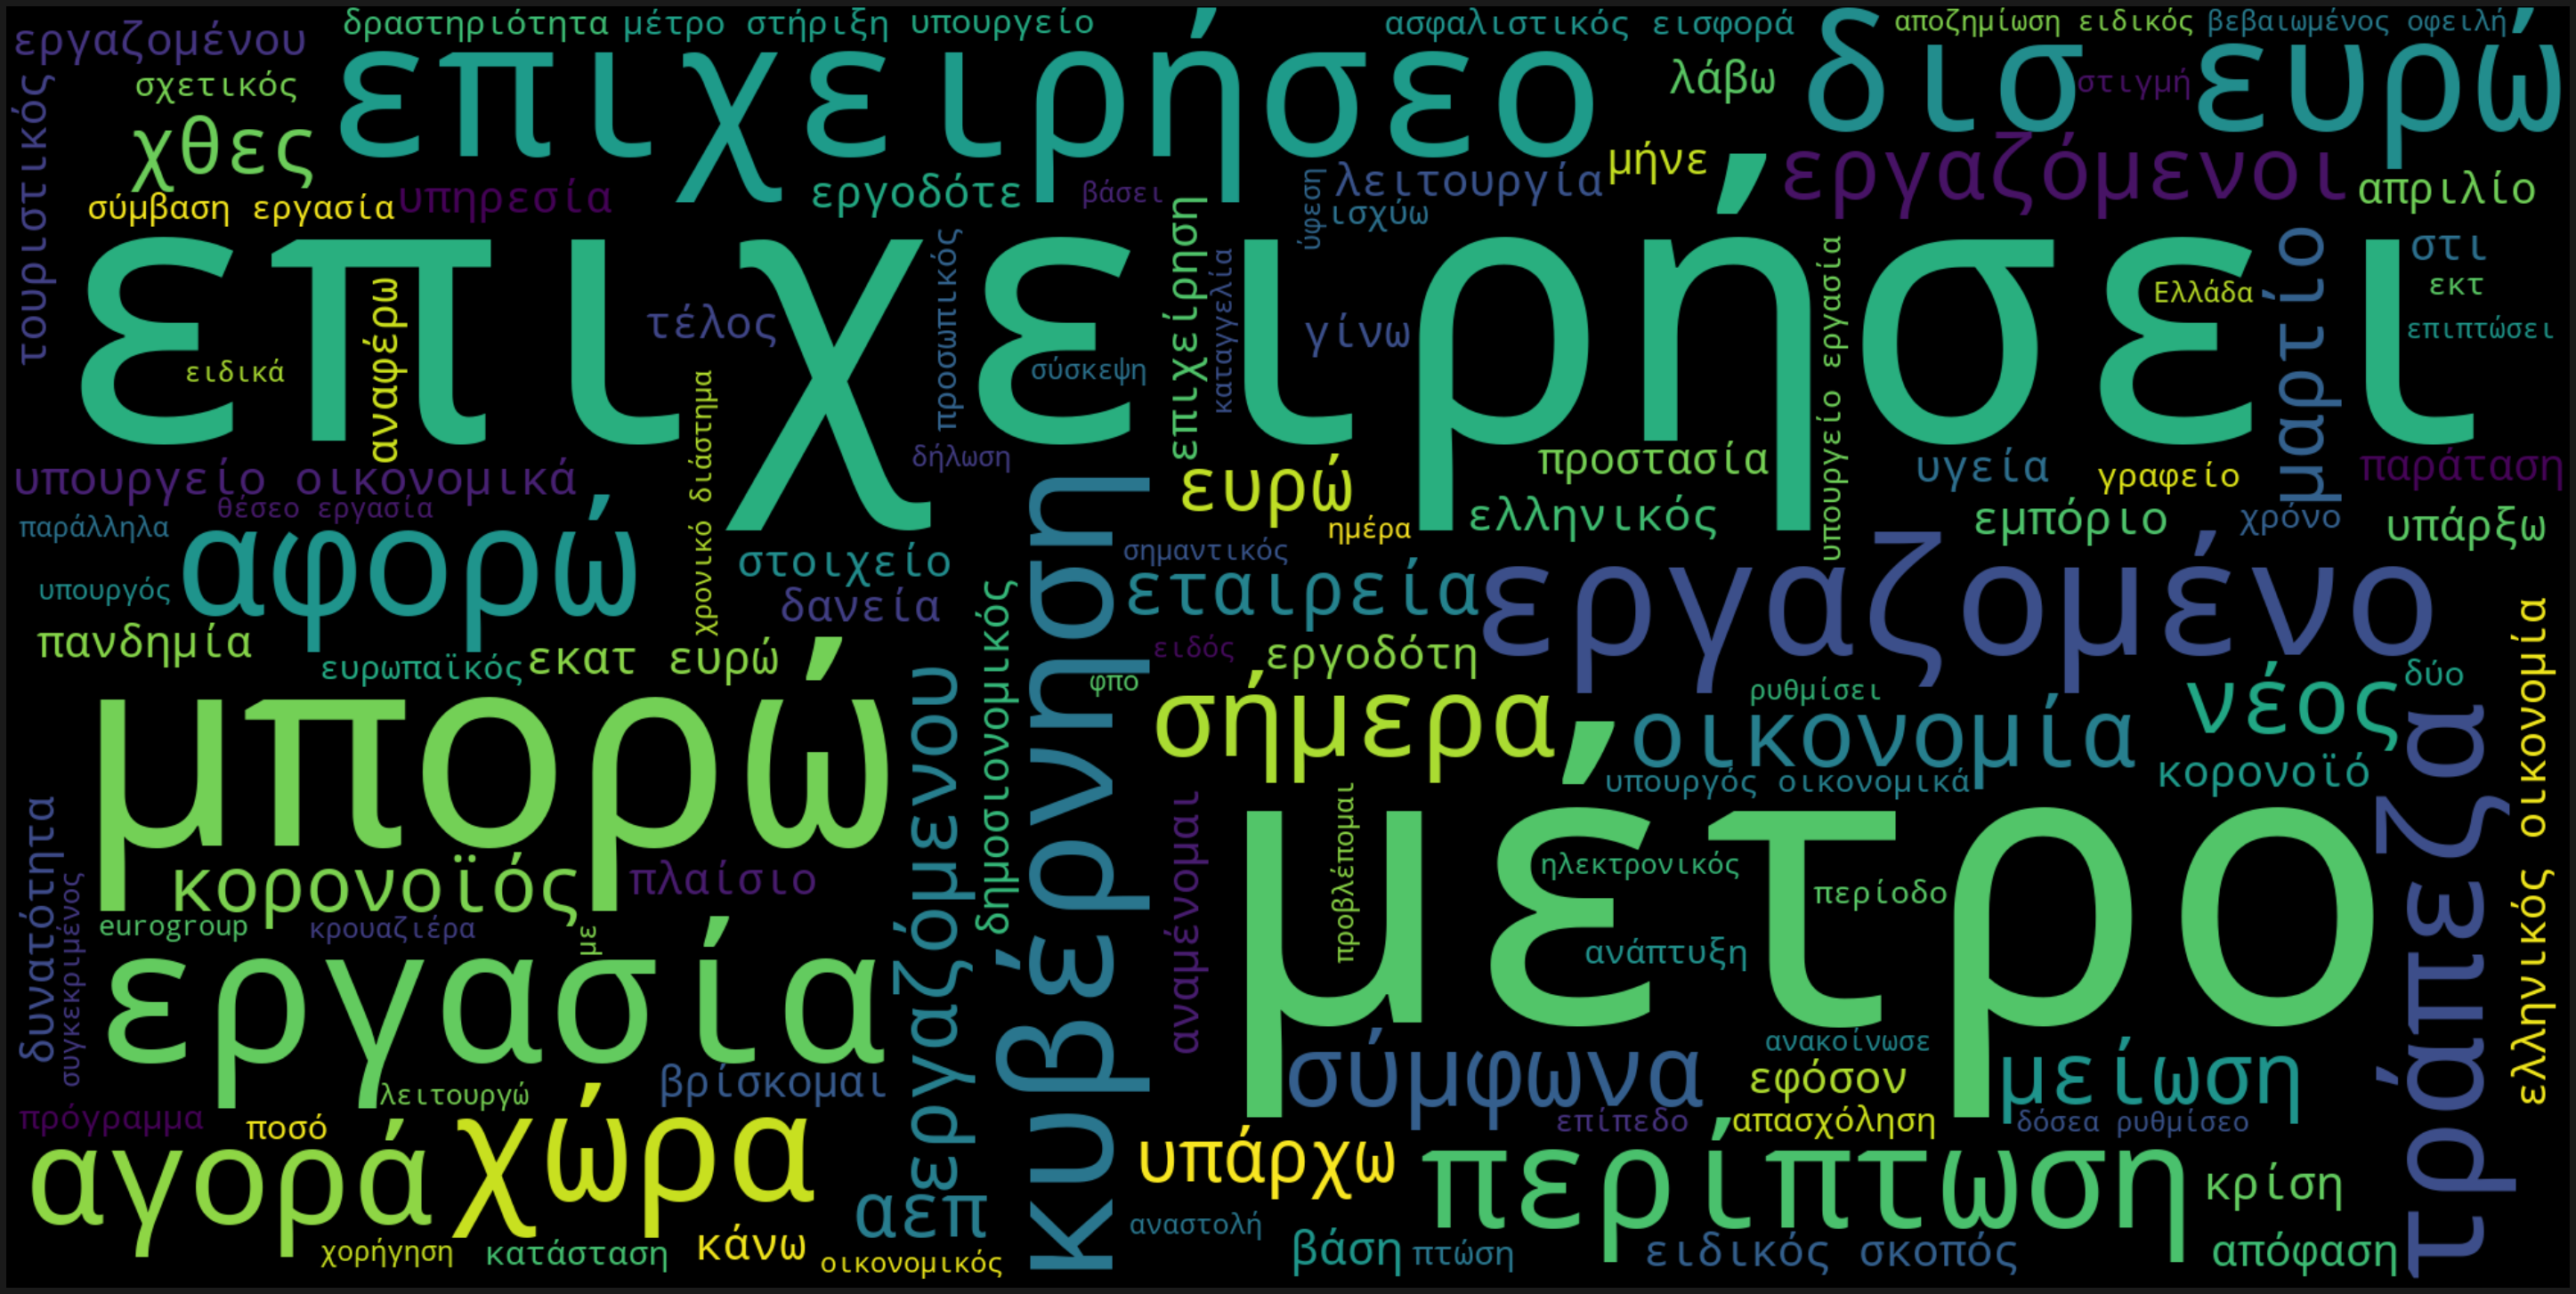

In [ ]:
wordcloud = WordCloud(
    max_words = 120,
    stopwords = ["article_end","googletag.cmd.push(function() {\ngoogletag.display","καδ"] + list(nlp.Defaults.stop_words),
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(clear_text1)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
#wordcloud για Μάιο του 2021

In [ ]:
text2 = b[b['month']==5]['body'].str.cat(sep = ' ').replace("googletag.cmd.push(function() {\ngoogletag.display", ' ')

In [ ]:
doc2 = nlp(df['body'][1])

In [ ]:
for token in doc2:
    print(token, token.lemma_)

Σε σε
ύφεση-τέρας ύφεση-τέρας
οδηγεί οδηγώ
ο ο
κορονοϊός κορονοϊός
την την
ελληνική ελληνικός
οικονομία οικονομία
. .
Νεότερες νεότερες
εκτιμήσεις εκτιμήσει
( (
μέσα μέσα
σε σε
μόνο μόνο
λίγες λίγες
μέρες μέρα
από από
τις τις
προηγούμενες προηγούμενα
για για
ύφεση ύφεση
4% 4%
) )
από από
τον τον
υπουργό υπουργό
Οικονομικών οικονομικά
, ,
Χρήστο Χρήστο
Σταϊκούρα Σταϊκούρα
, ,
προβλέπουν προβλέπω
ότι ότι
το το
ΑΕΠ αεπ
θα θα
βουλιάξει βουλιάξω
από από
5% 5%
έως έως
και και
10% 10%
φέτος φέτος
, ,
καταπίνοντας καταπίνω
επιχειρήσεις επιχειρήσει
, ,
εργαζόμενους εργαζόμενου
αλλά αλλά
και και
ολόκληρα ολόκληρα
κομμάτια κομμάτι
από από
τον τον
παραγωγικό παραγωγικό
ιστό ιστό
της της
χώρας χώρα
. .
Η η
διάλυση διάλυση
της της
ελληνικής ελληνικός
οικονομίας οικονομία
έχει έχω
ξεκινήσει ξεκινήσω
από από
τη τη
στιγμή στιγμή
που που
οι οι
τρεις τρεις
βασικοί βασικός
πυλώνες πυλώνα
της της
ανάπτυξης ανάπτυξη
, ,
τουρισμός τουρισμό
, ,
οικοδομή οικοδομή
και και
ακτοπλοΐα ακτοπλοΐα
, ,
έχουν έχω
μπει 

In [ ]:
' '.join(token.lemma_ for token in doc2)

'σε ύφεση-τέρας οδηγώ ο κορονοϊός την ελληνικός οικονομία . νεότερες εκτιμήσει ( μέσα σε μόνο λίγες μέρα από τις προηγούμενα για ύφεση 4% ) από τον υπουργό οικονομικά , Χρήστο Σταϊκούρα , προβλέπω ότι το αεπ θα βουλιάξω από 5% έως και 10% φέτος , καταπίνω επιχειρήσει , εργαζόμενου αλλά και ολόκληρα κομμάτι από τον παραγωγικό ιστό της χώρα . η διάλυση της ελληνικός οικονομία έχω ξεκινήσω από τη στιγμή που οι τρεις βασικός πυλώνα της ανάπτυξη , τουρισμό , οικοδομή και ακτοπλοΐα , έχω μπω σε αδράνεια . μόνο από τον τουρισμό και τις συναφείς δραστηριότητα ο προϋπολογισμό θα απολέσω έσοδο ύψου 19-20 δισ. ευρώ , ποσό το οποίο αντιστοιχώ περίπου στο 1/3 των συνολικός εισπράξεα ( 54 δισ. ευρώ ) για το 2020.είναι πλέον βέβαιο ( με βάση τα οικονομικά μοντέλας που τρέχω στο γενικό λογιστήριο του κράτου ) ότι ο φετινός προϋπολογισμό οδηγείται για πρώτη φορά μετά από πέντε χρόνια σε δημοσιονομικό έλλειμμα και στο υπουργείο οικονομικός ζούνε πλέον με τον φόβο πού ακριβώς θα φτάσω . το θέμα είναι τι 

In [ ]:
full_doc2 = nlp(text2)

In [ ]:
clear_text2 = ' '.join(token.lemma_ for token in full_doc2)

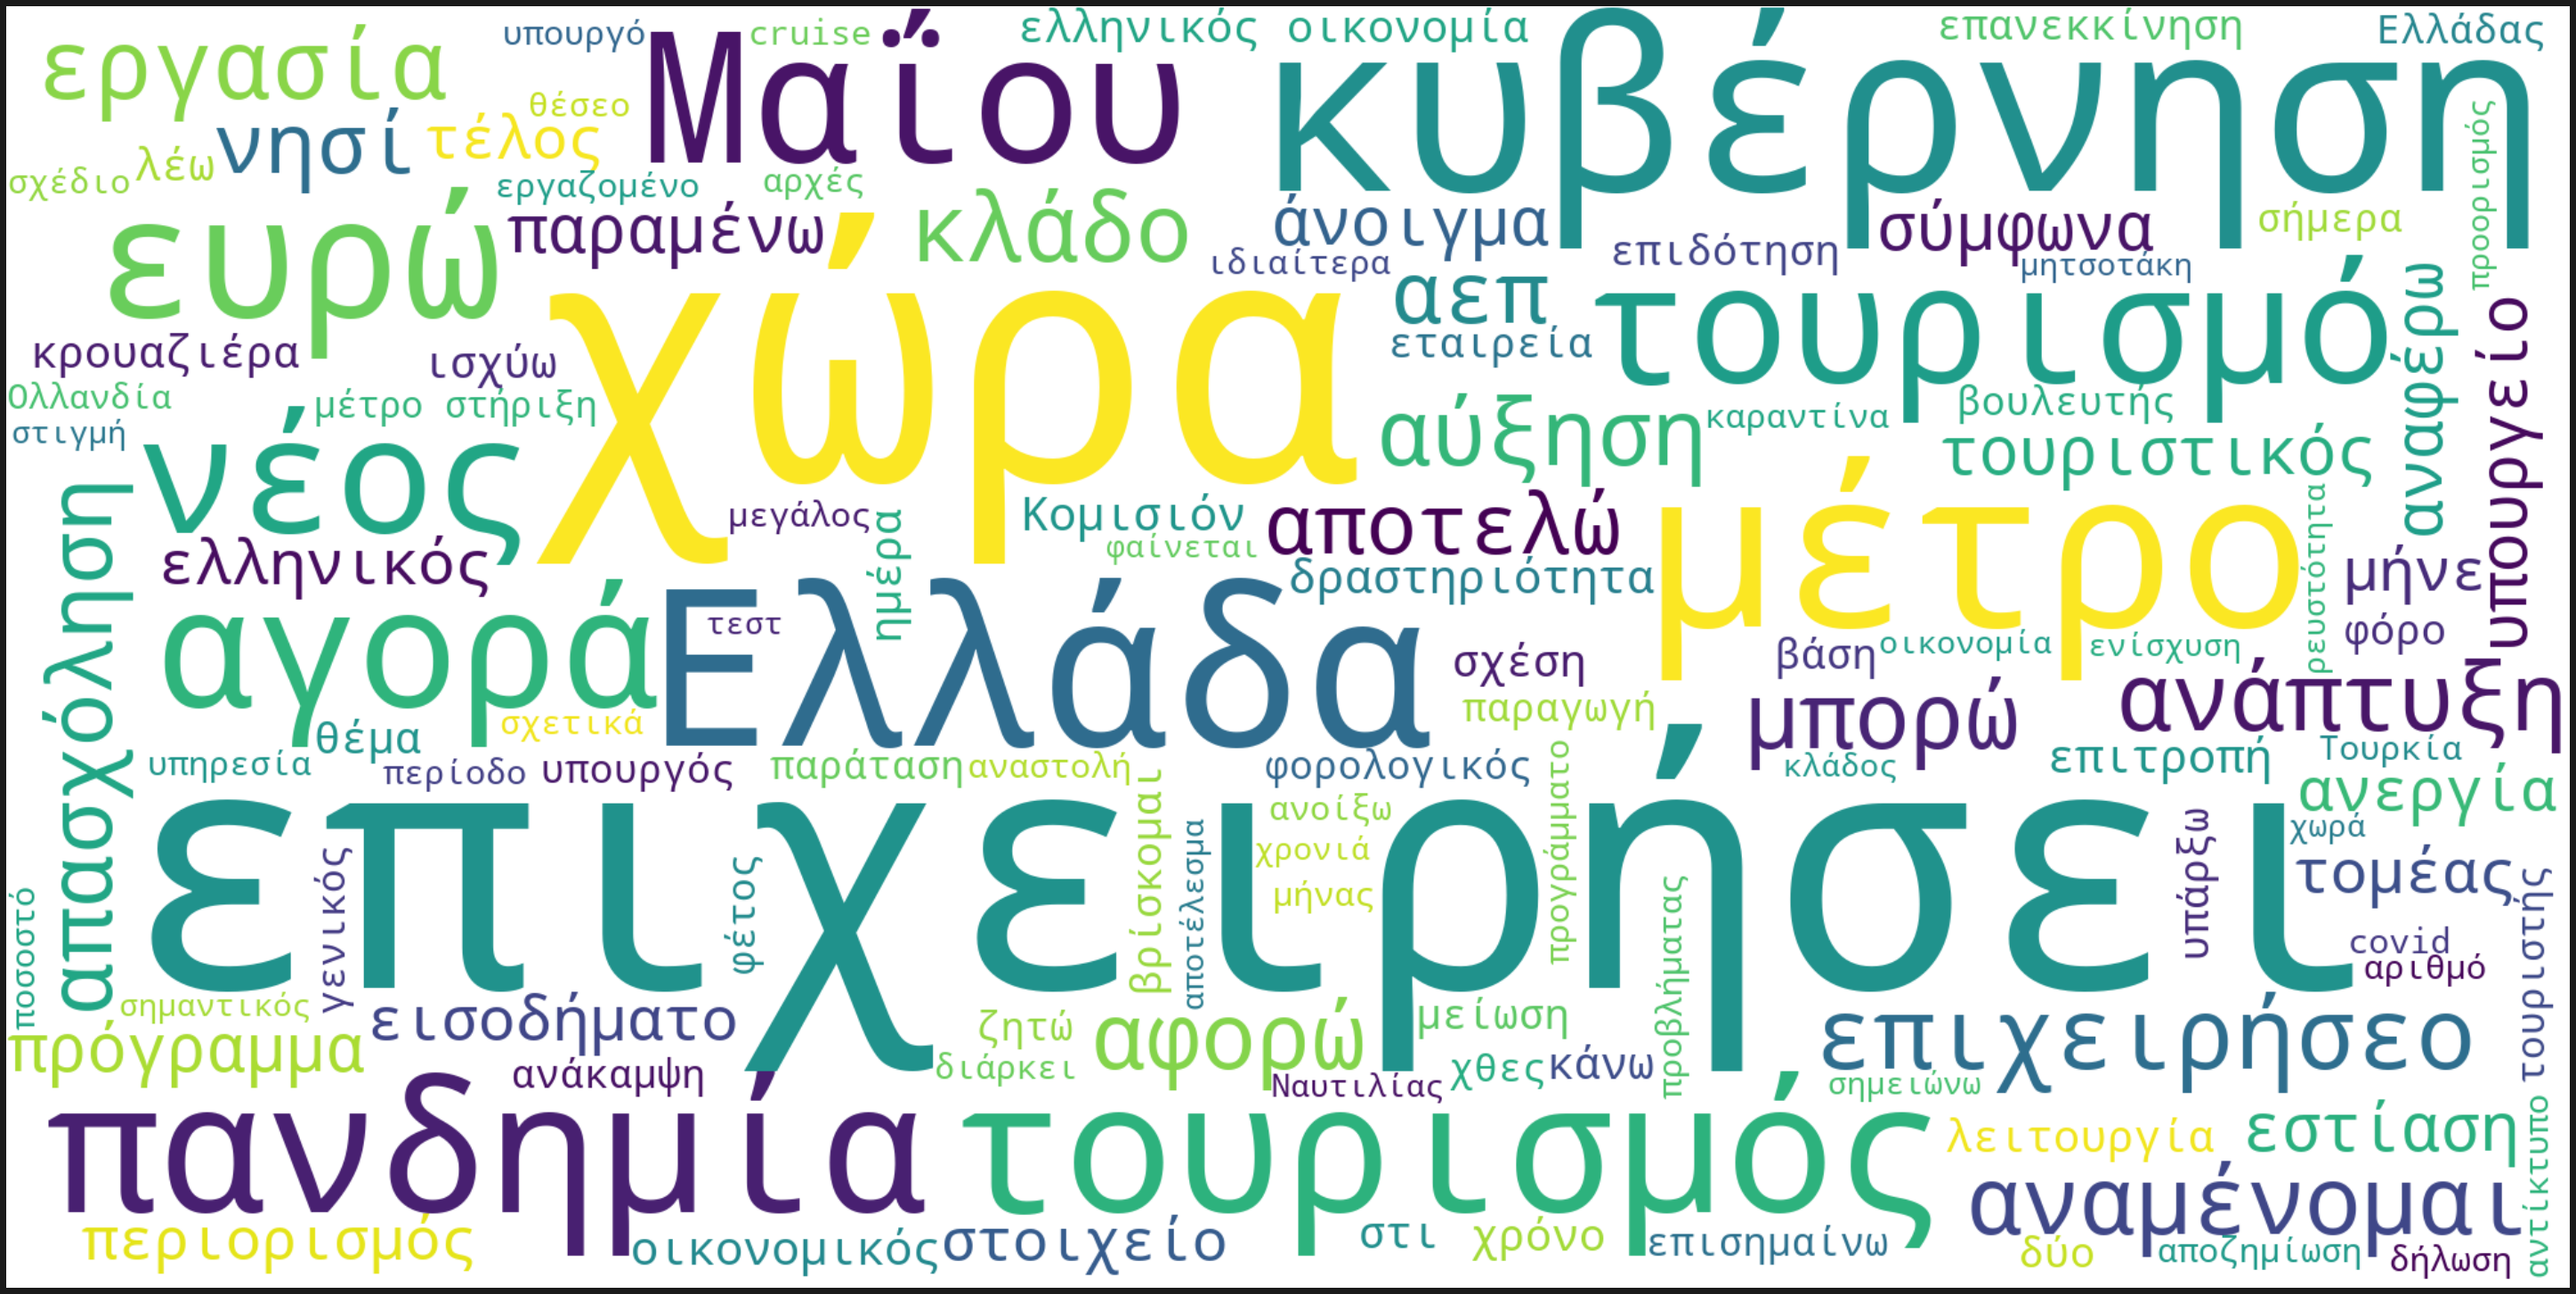

In [ ]:
wordcloud = WordCloud(
    max_words=120,
    stopwords = ["article_end","googletag.cmd.push(function() {\ngoogletag.display"] + list(nlp.Defaults.stop_words),
    width = 2000,
    height = 1000,
    background_color = 'white'
 ).generate(clear_text2)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

3. 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
count_vector = cv.fit_transform(df['body'])

In [ ]:
count_vector.shape

(593, 23925)

In [ ]:
results1 = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results1.head()

00  000  000νέο  001  002  005  ...  ώθηση  ώρα  ώρες  ώριμες  ώς  ώστε
0   0    0       0    0    0    0  ...      0    0     0       0   0     0
1   0    0       0    0    0    0  ...      0    0     0       0   0     0
2   0    1       0    0    0    0  ...      0    1     0       0   0     0
3   0    0       0    0    0    0  ...      0    1     0       0   0     1
4   0    0       0    0    0    0  ...      0    0     0       0   0     1

[5 rows x 23925 columns]

In [ ]:
cv = CountVectorizer(stop_words=["article_end","googletag.cmd.push(function() {\ngoogletag.display"] + list(nlp.Defaults.stop_words), min_df=0.01, max_df=0.95)

In [ ]:
count_vector = cv.fit_transform(df['body'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['cmd', 'display', 'function', 'googletag', 'push'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [ ]:
results1 = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results1.head()


00  000  01  02  03  04  05  ...  ύφεση  ύφεσης  ύψος  ύψους  ώρα  ώρες  ώς
0   0    0   0   0   0   0   0  ...      8       2     0      0    0     0   0
1   0    0   0   0   0   0   0  ...      3       1     0      1    0     0   0
2   0    1   0   0   0   0   0  ...      0       0     0      0    1     0   0
3   0    0   0   0   0   0   0  ...      0       0     0      0    1     0   0
4   0    0   0   0   0   0   0  ...      0       0     0      0    0     0   0

[5 rows x 4200 columns]

In [ ]:
from html import unescape
def my_tokenizer(doc):
            
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    return(lemmatized_tokens)

In [ ]:
 cv = CountVectorizer( stop_words= ["article_end","googletag.cmd.push(function() {\ngoogletag.display","cmd","display","embed","function","googletag","push","ευρώ","2020","δις","000","σύμφωνα","δισ","2021","10","30","εκατ","μέτρων","εργαζομένων","επιχειρήσεων","2019","20","50,""αφορά","μήνα"] + list(nlp.Defaults.stop_words), max_features=20) #,tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(df['body'])
 results1 = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results1.head()


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['50', 'αφορά'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


50  αναστολή  αφορά  διάστημα  ...  σήμερα  στοιχεία  σχέση  υπουργείο
0   0         0      0         0  ...       1         0      1          0
1   0         2      3         0  ...       0         0      1          2
2   1         1      0         1  ...       0         0      0          1
3   0         0      0         0  ...       0         0      0          0
4   2         0      0         0  ...       0         0      0          0

[5 rows x 20 columns]

In [ ]:
common_words =  results1.sum(axis =0)
common_words.sort_values(ascending = False).head(15)

επιχειρήσεις    1138
εργασίας         872
μέτρα            551
αναστολή         443
κυβέρνηση        422
οικονομικών      417
μείωση           407
εργαζόμενους     323
πανδημίας        310
κορονοϊού        289
διάστημα         289
υπουργείο        287
στοιχεία         280
αφορά            271
οικονομία        265
dtype: int64

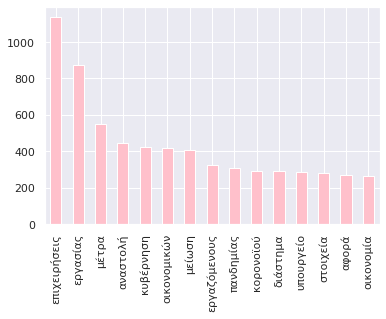

In [ ]:
c = common_words.sort_values(ascending = False).head(15).plot(kind='bar', color='pink')

In [ ]:
#αφαιρέθηκαν λέξεις όπως ευρώ, δις, εκατ, και αριθμοί κλπ

In [ ]:
cv = CountVectorizer( stop_words= ["article_end","googletag.cmd.push(function() {\ngoogletag.display","cmd","display","embed","function","googletag","push","app", "mycountrytalks",	"covid 19",	"data", "was",	"document","getelementbyid","getelementbyid","mycountrytalks",	"if", "wasresized",	"message", "evt",	"newscrolltop", "var",	"sars", "cov",	"scrollto", "newscrolltop",	"scrolltop", "document","var","additionalsafespace",	"currentscrolltop","ευρώ","υπουργείου","προκαταβολή"]+list(nlp.Defaults.stop_words), max_features=20, ngram_range=(2, 2)) #,tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['body'])
results2 = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results2.head()


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['19', 'covid'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


000 επιχειρήσεις  click away  ...  χρήστος σταϊκούρας  χρονικό διάστημα
0                 0           0  ...                   0                 0
1                 0           0  ...                   0                 0
2                 0           0  ...                   0                 0
3                 0           0  ...                   0                 0
4                 0           0  ...                   0                 0

[5 rows x 20 columns]

In [ ]:
sum_words =  results2.sum(axis =0)
sum_words.sort_values(ascending = False).head()

covid 19                 156
ειδικού σκοπού           141
χρονικό διάστημα         118
υπουργείο οικονομικών    114
λιανικό εμπόριο          101
dtype: int64

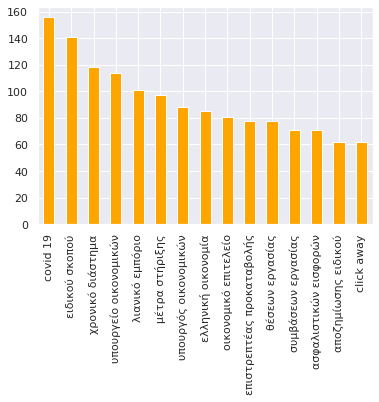

In [ ]:
sum_words.sort_values(ascending = False).head(15).plot(kind='bar', color='orange')

-------------

In [ ]:
june = df[df['month']==6]
june

title  ... num_wds
0    Τσακαλώτος: Η Ν.Δ μας έβαλε σε τροχιά ύφεσης π...  ...     537
66   Αναστολή φορολογικών υποχρεώσεων Ιουνίου μέχρι...  ...     168
75   Νέο πρόγραμμα για 36.500 ανέργους | Η Εφημερίδ...  ...     567
86   Απρόθυμοι για δηλώσεις εισοδήματος οι φορολογο...  ...     648
98   Στα 10 δισ. ευρώ η ζημιά φέτος στον τουρισμό |...  ...     438
100  Ενας μήνας... τραπεζάκια έξω, με κορονο-χρέη κ...  ...     341
121  Παράταση μέχρι την Παρασκευή για την επιστρεπτ...  ...     331
124  Από τη Δευτέρα ξεκινά η επιδότηση των εισφορών...  ...     617
145  Εκκλήσεις και υποσχέσεις για τον τουρισμό | Η ...  ...     579
164  Προβληματισμός για το βάθος της ύφεσης | Η Εφη...  ...     393
175  «ΣΥΝ-ΕΡΓΑΣΙΑ» η λύση για την ελληνική οικονομί...  ...     590
191  Νέες παρατάσεις έως 3 και 4 Ιουνίου για ειδική...  ...     349
195  Τι ισχύει για την έκτακτη αποζημίωση ανέργων σ...  ...     417
206  Τι θα ισχύσει για τον τουρισμό από τη Δευτέρα ...  ...     414
218  Σε 6 δόσεις ο φετινός ΕΝΦΙΑ | Η Εφημερίδα των ...  ...     186
258  Στην «εντατική» τα δημόσια έσοδα | Η Εφημερίδα...  ...     608
328  ΣΥΝ-ΕΡΓΑΣΙΑ και για μέρος των εισφορών | Η Εφη...  ...     457
338  Αναρτάς αφίσα για να πάρεις τα 534 ευρώ! | Η Ε...  ...     235
341  Σε καραντίνα μπαίνει η ΚΥΑ για την καραντίνα |...  ...     547
362  Συνοπτικοί οι φορολογικοί έλεγχοι | Η Εφημερίδ...  ...     378
374  Στην εκκίνηση και η «ΣΥΝ-ΕΡΓΑΣΙΑ» | Η Εφημερίδ...  ...     479
386  Προϋποθέσεις και κοστολόγιο για τα ξενοδοχεία ...  ...     371
402  Φρενάρει τον τουρισμό η μετάλλαξη «Δέλτα» | Η ...  ...     517
490  Απαγόρευση απολύσεων ζητά η ΓΣΕΕ από τον Γ. Βρ...  ...     847
491  Δυσμενής η κατάσταση των επιχειρήσεων | Η Εφημ...  ...     238
497  Αποκαρδιωτικά τα πρώτα στοιχεία για τον τουρισ...  ...     247
501  Ο φόβος ακυρώνει τα ταξίδια | Η Εφημερίδα των ...  ...     481
561  Στην 7η αξιολόγηση με όπλο την... κατάρρευση τ...  ...     600
578  Πλήγμα στις προσδοκίες | Η Εφημερίδα των Συντα...  ...     490

[29 rows x 11 columns]

In [ ]:
len(june)

29

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(june['body'])  #finds the tfidf score with normalization


In [ ]:
results1 = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
results1.head()

000        10        12        14  ...  όρους     ύφεση    ύφεσης  ύψος
0  0.000000  0.000000  0.000000  0.000000  ...    0.0  0.455785  0.113946   0.0
1  0.000000  0.000000  0.125976  0.000000  ...    0.0  0.000000  0.000000   0.0
2  0.000000  0.000000  0.000000  0.000000  ...    0.0  0.000000  0.000000   0.0
3  0.078476  0.000000  0.045907  0.048789  ...    0.0  0.000000  0.000000   0.0
4  0.000000  0.040524  0.054186  0.057588  ...    0.0  0.000000  0.000000   0.0

[5 rows x 500 columns]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with other three elements

cosine scores ==>  [[1.         0.02248804 0.00912034 0.07340936 0.11288566 0.10267034
  0.04643793 0.05754579 0.08926878 0.20795051 0.11578936 0.02576462
  0.02334575 0.08539741 0.02268573 0.19319646 0.14138977 0.03713704
  0.04266941 0.03079265 0.04078184 0.01988818 0.12098715 0.05879648
  0.07725812 0.03614519 0.07660186 0.10764337 0.08866286]]


In [ ]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with other three elements

cosine scores ==>  [[1.         0.02248804 0.00912034 0.07340936 0.11288566 0.10267034
  0.04643793 0.05754579 0.08926878 0.20795051 0.11578936 0.02576462
  0.02334575 0.08539741 0.02268573 0.19319646 0.14138977 0.03713704
  0.04266941 0.03079265 0.04078184 0.01988818 0.12098715 0.05879648
  0.07725812 0.03614519 0.07660186 0.10764337 0.08866286]
 [0.02248804 1.         0.03401945 0.17509293 0.04075284 0.05791739
  0.14789262 0.04120868 0.05943557 0.06522002 0.11291744 0.13221153
  0.0219424  0.04980552 0.2481361  0.06803862 0.11826652 0.07888438
  0.03242696 0.08867667 0.11673389 0.05729598 0.07757184 0.06776954
  0.08180262 0.01150248 0.01768642 0.09588539 0.12898628]
 [0.00912034 0.03401945 1.         0.0760927  0.0731301  0.06323863
  0.06552526 0.1832353  0.05150913 0.07708615 0.05633786 0.09130439
  0.12932323 0.05645127 0.07690866 0.07657044 0.12430152 0.08798827
  0.05925413 0.01587447 0.10182047 0.13841844 0.02683441 0.11122973
  0.04164731 0.04089763 0.08166476 0.05357977 0.0

In [ ]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

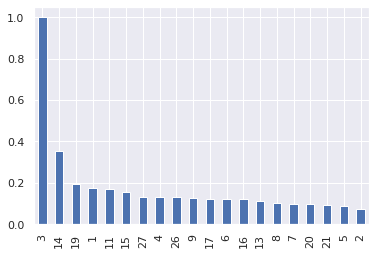

In [ ]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')

In [ ]:
import seaborn as sns; sns.set_theme()

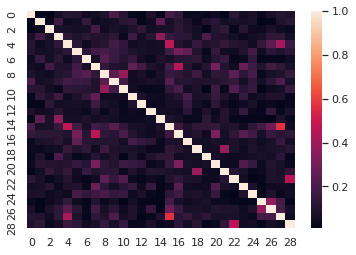

In [ ]:
ax = sns.heatmap(arr)

In [ ]:
june['url'][218]

'https://www.efsyn.gr/oikonomia/elliniki-oikonomia/250019_se-6-doseis-o-fetinos-enfia'

In [ ]:
june['url'][501]

'https://www.efsyn.gr/oikonomia/elliniki-oikonomia/248951_o-fobos-akyronei-ta-taxidia'

---------

In [ ]:
import itertools
import re
import string
def clean_text(article):
    clean1 = re.sub(r'['+string.punctuation + '’—”'+']', "", article.lower())
    return re.sub(r'\W+', ' ', clean1)

In [ ]:
df['tokenized'] = df['body'].map(lambda x: clean_text(x))

In [ ]:
df.body = [str (item) for item in df['body']]

In [ ]:
df['tokenized'] = df['body'].map(lambda x: clean_text(x))

In [ ]:
#ο μέσος όρος των λέξεων στα άρθρα

In [ ]:
df['num_wds'] = df['tokenized'].apply(lambda x: len(x.split()))
df['num_wds'].mean()

479.1112984822934

In [ ]:
#πόσα άρθρα έχουν τόσες λέξεις. πιο σύνηθες είναι να έχουν γύρω στις 500:

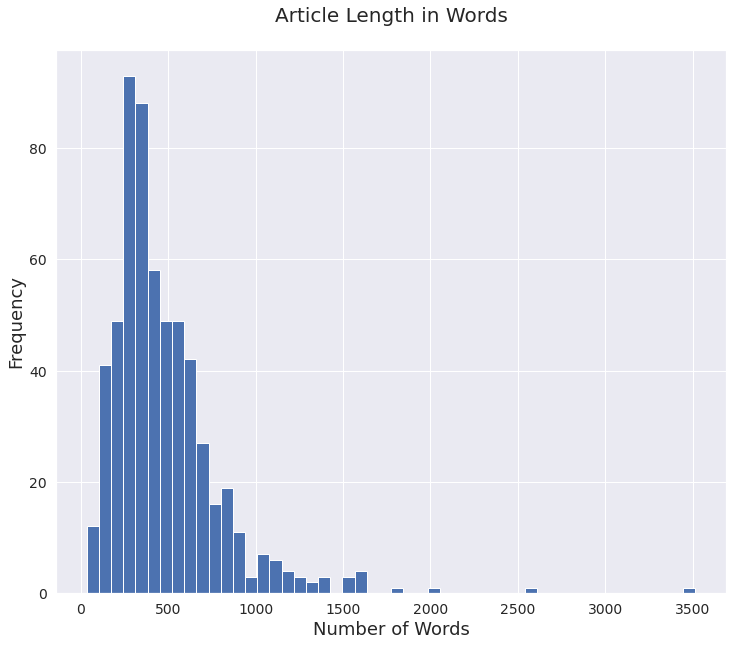

In [ ]:
ax=df['num_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Article Length in Words\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Words', fontsize=18);

In [ ]:
df1 = df.reset_index()



In [ ]:
df1.sort_values(by='date')

index  ... num_wds
51      51  ...     312
481    481  ...      96
182    182  ...    1582
39      39  ...     234
387    387  ...     480
..     ...  ...     ...
276    276  ...     576
208    208  ...    3517
253    253  ...     800
251    251  ...     340
320    320  ...     236

[593 rows x 12 columns]

In [ ]:
df1['uniq_wds'] = df1['tokenized'].str.split().apply(lambda x: len(set(x)))
df1['uniq_wds'].head()

0    282
1    422
2    361
3    104
4    138
Name: uniq_wds, dtype: int64

In [ ]:
df1['uniq_wds'].mean()

262.6424957841484

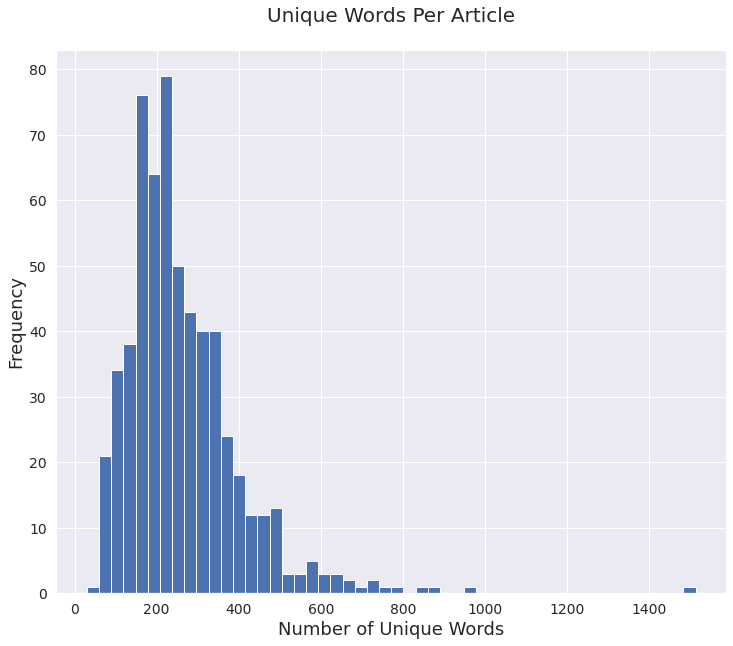

In [ ]:
ax=df1['uniq_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Unique Words Per Article\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Unique Words', fontsize=18);